In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
from PIL import Image

In [15]:
dataset_dir = '/opt/ml/dataset/'
valset_path = "/opt/ml/dataset/2___val_MultiStfKFold.json"
with open(valset_path, 'r') as f:
    valset = json.load(f)

In [16]:
def grid_image(image, image_id, bbox_list, class_list):
    colors = ["r", "g", "b", "c", "m", "y", "k", "darkorange", "limegreen", "deepskyblue"] # bbox 색상 리스트
    classes_index = ["General trash", "Paper", "Paper pack", "Metal", "Glass","Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
    fig, axes = plt.subplots(3,4, figsize=(14,12))
    axes = axes.flatten()
    for i in range(len(image)):
        bboxes = bbox_list[i]
        classes = class_list[i]
        axes[i].imshow(image[i])
        axes[i].axis("off")
        axes[i].set_title("index: "+ str(image_id[i])+", num_bbox: " + str(len(bbox_list[i])))
        for _, (bbox, class_id) in enumerate(zip(bboxes, classes)):
            x, y, w, h = bbox
            w, h = int(w), int(h)    
            class_id = int(class_id)    
            # bbox 시각화
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=colors[class_id], facecolor="none")
            axes[i].add_patch(rect)
            # bbox 라벨 시각화
            label = classes_index[class_id]
            # ax.text(x, y-5, label, fontsize=8, color=colors[class_id], fontweight="bold")
            bbox_props = dict(boxstyle="square,pad=0.3", fc=colors[class_id], ec=colors[class_id], lw=0.3)
            # '''
            # fc 속성을 사용하여 글자 배경 색상을 설정하고,
            # ec 속성을 사용하여 상자 테두리 색상을 설정합니다. 
            # lw 속성을 사용하여 상자 테두리 두께를 설정할 수 있습니다.
            # '''
            axes[i].text(x, y-5, label, fontsize=8, color="w", fontweight="bold", bbox=bbox_props)

    return None

In [17]:
valset["images"]

[{'width': 1024,
  'height': 1024,
  'file_name': 'train/0005.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-01-02 16:48:22',
  'id': 5},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/0013.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2020-12-31 23:57:47',
  'id': 13},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/0019.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-01-04 14:33:19',
  'id': 19},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/0038.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-01-04 11:20:49',
  'id': 38},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/0041.jpg',
  'license': 0,
  'flickr_url': None,
  'coco_url': None,
  'date_captured': '2021-01-04 13:49:35',
  'id': 41},
 {'width': 1024,
  'height': 1024,
  'file_name': 'train/0048.jpg',
  'license': 0,
  'flickr_ur

In [18]:
indexes = [i["id"] for i in valset["images"]]
filenames = [i["file_name"] for i in valset["images"]]
annotations = pd.DataFrame(valset["annotations"])

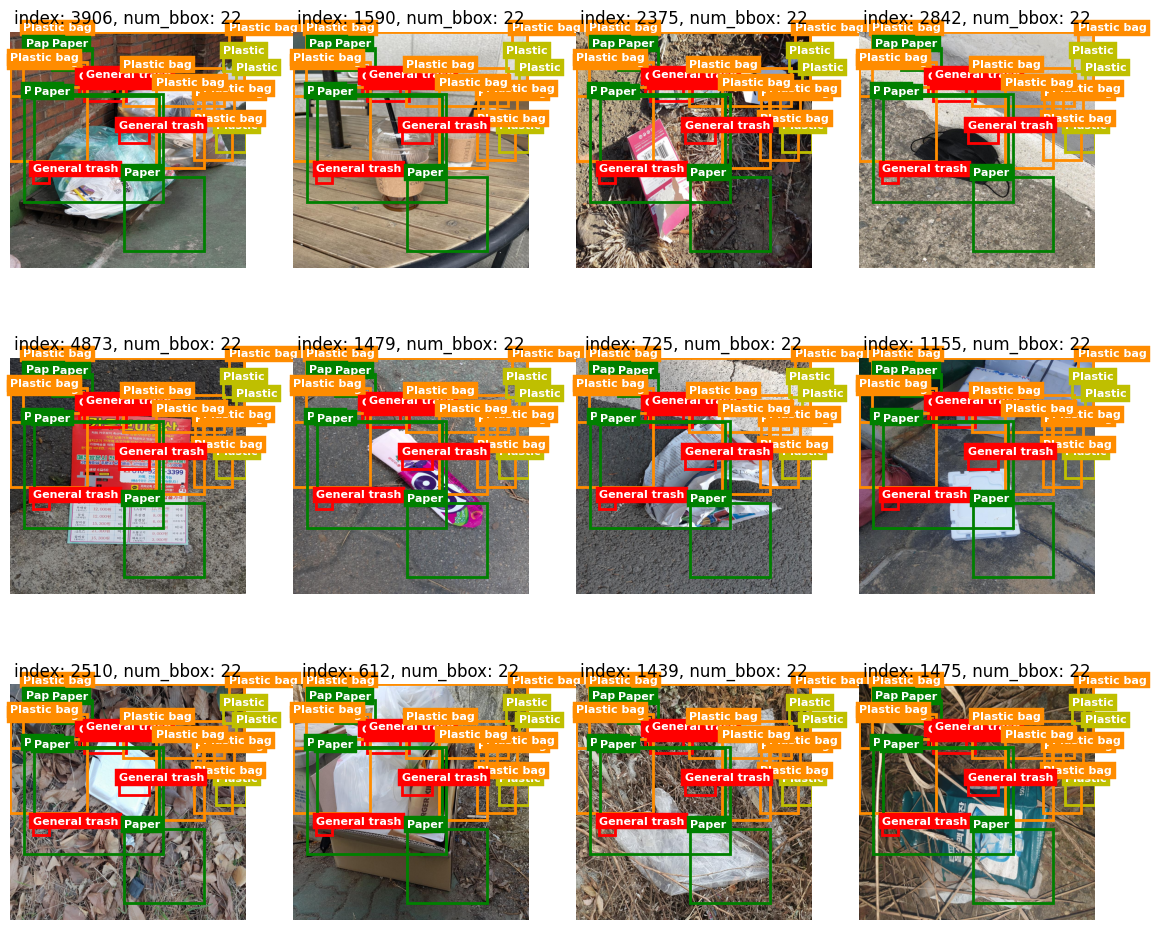

In [19]:
total_bbox=[]
total_class=[]
total_image=[]
total_id=[]
for i in random.sample(range(len(indexes)), 12):       #test image에서 랜덤하게 12개 샘플링
    image_path = filenames[i]
    image = Image.open(dataset_dir+image_path)
    image_id = indexes[i]

    bbox_list = []
    class_list = []
    
    predictions = annotations[annotations["image_id"]==5]
    bbox_list = list(predictions["bbox"])
    class_list = list(predictions["category_id"])

    total_image.append(image)
    total_id.append(image_id)
    total_bbox.append(bbox_list)
    total_class.append(class_list)
grid_image(total_image, total_id, total_bbox, total_class)

